<a href="https://colab.research.google.com/github/jsebastiants/Phone_list/blob/master/Trading_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/BTC-USD.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-06,2608.100098,2616.719971,2581.689941,2608.560059,2608.560059,7.619570e+08
1,2017-07-07,2608.590088,2916.139893,2498.870117,2518.659912,2518.659912,9.174120e+08
2,2017-07-08,2520.270020,2571.340088,2492.310059,2571.340088,2571.340088,7.333300e+08
3,2017-07-09,2572.610107,2635.489990,2517.590088,2518.439941,2518.439941,5.278560e+08
4,2017-07-10,2525.250000,2537.159912,2321.129883,2372.560059,2372.560059,1.111200e+09


In [ ]:
type(data)

pandas.core.frame.DataFrame

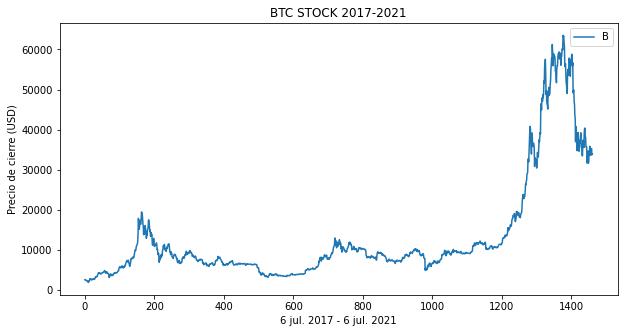

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='BTC stock')
plt.title('BTC STOCK 2017-2021')
plt.xlabel('6 jul. 2017 - 6 jul. 2021')
plt.ylabel('Precio de cierre (USD)')
plt.legend('BTC-USD')
plt.show()

In [ ]:
MVS30 = pd.DataFrame()
MVS30['Close'] = data['Close'].rolling(window=30).mean()
MVS30

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1457,35618.789974
1458,35467.449349
1459,35413.895182
1460,35353.696745


In [ ]:
MVS100 = pd.DataFrame()
MVS100['Close'] = data['Close'].rolling(window=100).mean()
MVS100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1457,46931.197461
1458,46760.841328
1459,46562.346016
1460,46340.070938


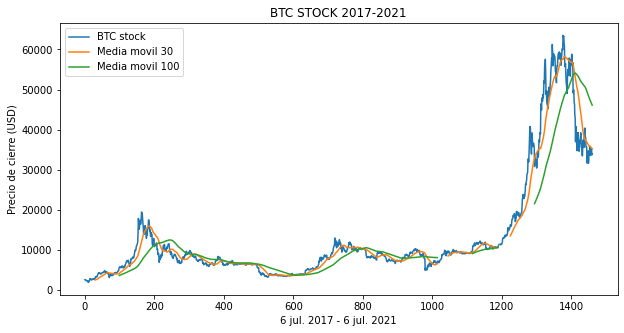

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='BTC stock')
plt.plot(MVS30['Close'], label='Media movil 30')
plt.plot(MVS100['Close'], label='Media movil 100')
plt.title('BTC STOCK 2017-2021')
plt.xlabel('6 jul. 2017 - 6 jul. 2021')
plt.ylabel('Precio de cierre (USD)')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
datos = pd.DataFrame()
datos['BTC'] = data['Close']
datos['MVS30'] = MVS30['Close']
datos['MVS100'] = MVS100['Close']
datos

,BTC,MVS30,MVS100
0,2608.560059,NaN,NaN
1,2518.659912,NaN,NaN
2,2571.340088,NaN,NaN
3,2518.439941,NaN,NaN
4,2372.560059,NaN,NaN
...,...,...,...
1457,33897.046875,35618.789974,46931.197461
1458,34668.546875,35467.449349,46760.841328
1459,35287.781250,35413.895182,46562.346016
1460,33746.003906,35353.696745,46340.070938


In [ ]:
def senal(datos):
    compra = []
    venta = []
    condicion = 0
    
    for dia in range(len(datos)):
        
        if datos['MVS30'][dia] > datos['MVS100'][dia]:
            if condicion != 1:
                compra.append(datos['BTC'][dia])
                venta.append(np.nan)
                condicion = 1
            else:
                compra.append(np.nan)
                venta.append(np.nan)
            
        elif datos['MVS30'][dia] < datos['MVS100'][dia]:
            if condicion != -1:
                venta.append(datos['BTC'][dia])
                compra.append(np.nan)
                condicion = -1
            else:
                compra.append(np.nan)
                venta.append(np.nan)
        else:
            compra.append(np.nan)
            venta.append(np.nan)
            
    return (compra, venta)

In [ ]:
senales = senal(datos)
datos['Compra'] = senales[0]
datos['Venta'] = senales[1]
datos

,BTC,MVS30,MVS100,Compra,Venta
0,2608.560059,NaN,NaN,NaN,NaN
1,2518.659912,NaN,NaN,NaN,NaN
2,2571.340088,NaN,NaN,NaN,NaN
3,2518.439941,NaN,NaN,NaN,NaN
4,2372.560059,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1457,33897.046875,35618.789974,46931.197461,NaN,NaN
1458,34668.546875,35467.449349,46760.841328,NaN,NaN
1459,35287.781250,35413.895182,46562.346016,NaN,NaN
1460,33746.003906,35353.696745,46340.070938,NaN,NaN


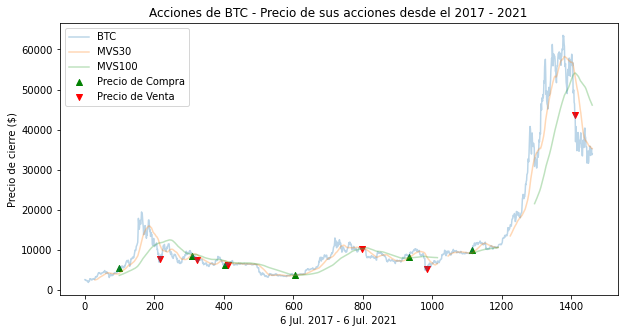

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(datos['BTC'], label = 'BTC', alpha = 0.3)
plt.plot(datos['MVS30'], label = 'MVS30', alpha = 0.3)
plt.plot(datos['MVS100'], label = 'MVS100', alpha = 0.3)
plt.scatter(datos.index, datos['Compra'], label = 'Precio de Compra', marker = '^', color = 'green')
plt.scatter(datos.index, datos['Venta'], label = 'Precio de Venta', marker = 'v', color = 'red')
plt.title('Acciones de BTC - Precio de sus acciones desde el 2017 - 2021')
plt.xlabel('6 Jul. 2017 - 6 Jul. 2021')
plt.ylabel('Precio de cierre ($)')
plt.legend(loc = 'upper left')
plt.show()